In [1]:
url="https://s3.us-east-2.amazonaws.com/datafaculty/bootcamp/dm_t.csv"

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
dm = pd.read_csv(url)

In [12]:
### missing values
dm.isnull().sum()

Age         0
Gender      0
OwnHome     0
Married     0
Location    0
Salary      0
Children    0
History     0
Catalogs    0
Cust_Id     0
target      0
dtype: int64

In [14]:
dm['History'].describe()

count     1000
unique       4
top        New
freq       303
Name: History, dtype: object

In [8]:
dm['History'].fillna('New',inplace=True)

In [11]:
dm['History'].unique()

array(['High', 'Low', 'Medium', 'New'], dtype=object)

In [23]:
dm.shape

(1000, 18)

In [15]:
dm=pd.get_dummies(dm)

In [20]:
dm.head()

,Salary,Children,Catalogs,Cust_Id,target,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
0,47500,0,6,247,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,63600,0,6,127,1,1,0,0,0,1,0,1,0,1,1,0,1,0,0
2,13500,0,18,479,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0
3,85600,1,18,475,1,1,0,0,0,1,1,0,1,0,1,0,1,0,0
4,68400,0,12,151,1,1,0,0,1,0,1,0,0,1,1,0,1,0,0


In [22]:
dm=dm.drop(['History_New','Cust_Id'],axis=1)

In [24]:
y=dm['target']
x=dm.drop('target',axis=1)

In [25]:
### create train and test parts of the data
import sklearn.model_selection as model_selection

In [26]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=200)

In [44]:
import sklearn.tree as tree

In [45]:
clf=tree.DecisionTreeClassifier(max_depth=3)

In [58]:
clf1=tree.DecisionTreeClassifier(max_depth=4)

In [59]:
clf2=tree.DecisionTreeClassifier(max_depth=8)

In [46]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
### Create a graphical representation of the tree
import pydotplus
import os 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [48]:
graph=tree.export_graphviz(clf,feature_names=x_train.columns,class_names=['0','1'],proportion=True,filled=True,out_file=None)

In [49]:
graph

'digraph Tree {\nnode [shape=box, style="filled", color="black"] ;\n0 [label="Salary <= 58650.0\\ngini = 0.485\\nsamples = 100.0%\\nvalue = [0.588, 0.412]\\nclass = 0", fillcolor="#e581394c"] ;\n1 [label="History_High <= 0.5\\ngini = 0.254\\nsamples = 55.4%\\nvalue = [0.851, 0.149]\\nclass = 0", fillcolor="#e58139d2"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Salary <= 32650.0\\ngini = 0.195\\nsamples = 52.5%\\nvalue = [0.89, 0.11]\\nclass = 0", fillcolor="#e58139e0"] ;\n1 -> 2 ;\n3 [label="gini = 0.0\\nsamples = 26.4%\\nvalue = [1.0, 0.0]\\nclass = 0", fillcolor="#e58139ff"] ;\n2 -> 3 ;\n4 [label="gini = 0.343\\nsamples = 26.1%\\nvalue = [0.78, 0.22]\\nclass = 0", fillcolor="#e58139b7"] ;\n2 -> 4 ;\n5 [label="Catalogs <= 9.0\\ngini = 0.227\\nsamples = 2.9%\\nvalue = [0.13, 0.87]\\nclass = 1", fillcolor="#399de5d9"] ;\n1 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 0.2%\\nvalue = [1.0, 0.0]\\nclass = 0", fillcolor="#e58139ff"] ;\n5 -> 6 ;\n7 [label="gini =

In [50]:
graph=pydotplus.graph_from_dot_data(graph)

In [51]:
from IPython.display import Image

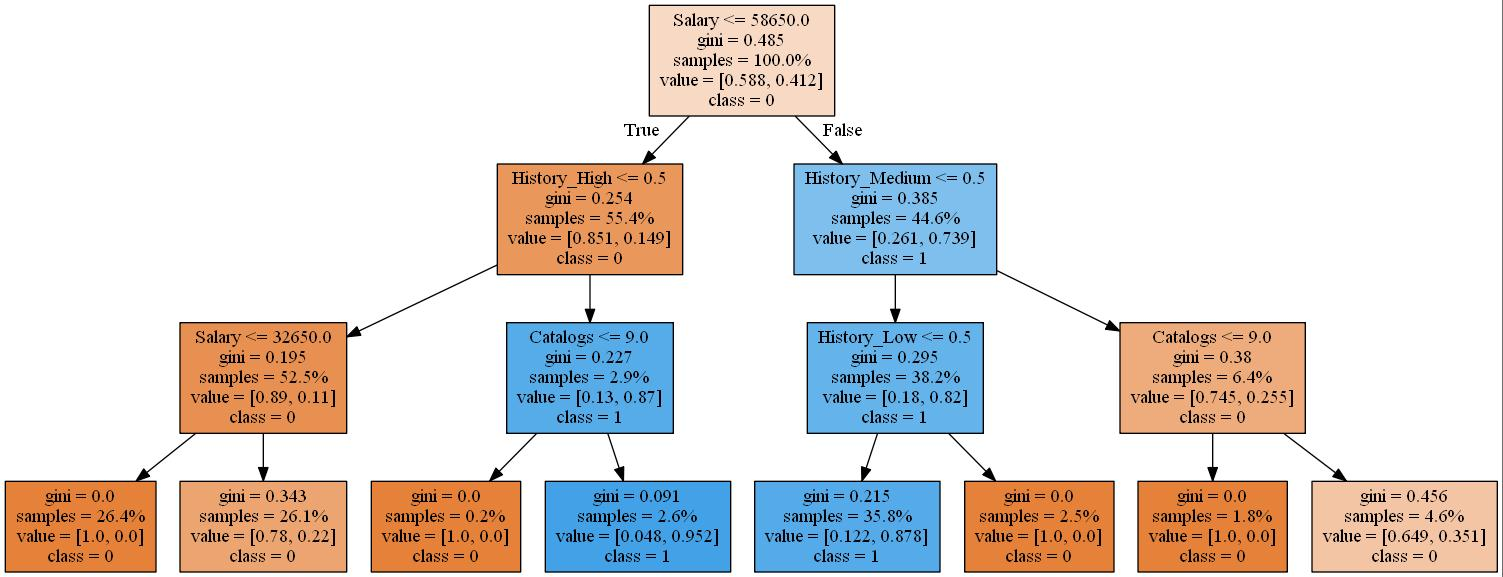

In [53]:
Image(graph.create_jpeg())

In [54]:
clf.predict(x_test)

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [55]:
y_test_prediction=clf.predict(x_test)

In [56]:
results=pd.DataFrame({'actual':y_test,'predicted':y_test_prediction})

In [57]:
results.head()

,actual,predicted
674,0,0
233,1,1
739,0,0
865,1,1
523,1,1


In [60]:
clf.score(x_test,y_test)

0.885

In [62]:
### Create another model with max_depth = 4 and check the accuracy
clf1=tree.DecisionTreeClassifier(max_depth=4)
clf1=clf1.fit(x_train,y_train)

In [65]:
clf1.score(x_test,y_test)

0.87

In [78]:
### Create another model with max_depth = 6 and check the accuracy
clf2=tree.DecisionTreeClassifier(max_depth=6)
clf2=clf1.fit(x_train,y_train)

In [79]:
clf2.score(x_test,y_test)

0.87

In [70]:
### Confusion matrix
import sklearn.metrics as metrics

In [80]:
y_test_prediction ## model with depth of 3
y_testprediction1=clf1.predict(x_test) ## model with depth of 4
y_testprediction2=clf2.predict(x_test) ## model with depth of 6

In [81]:
metrics.confusion_matrix(y_test,y_test_prediction)

array([[120,  11],
       [ 12,  57]], dtype=int64)

In [82]:
metrics.confusion_matrix(y_test,y_testprediction1)

array([[124,   7],
       [ 19,  50]], dtype=int64)

In [83]:
metrics.confusion_matrix(y_test,y_testprediction2)

array([[124,   7],
       [ 19,  50]], dtype=int64)

In [84]:
p1=clf.predict_proba(x_test)[:,1]
p2=clf1.predict_proba(x_test)[:,1]
p3=clf2.predict_proba(x_test)[:,1]

In [85]:
### TPR and FPR from tree 1 (max_depth=3)
fpr,tpr,thresh=metrics.roc_curve(y_test,p1)

In [87]:
import matplotlib.pyplot as plt

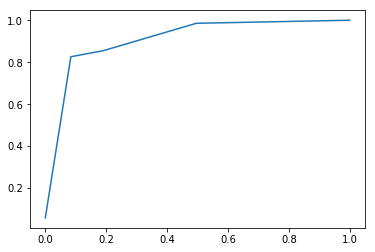

In [88]:
plt.plot(fpr,tpr,"-")

In [95]:
### TPR and FPR from tree 2 (max_depth=4)
fpr1,tpr1,thresh1=metrics.roc_curve(y_test,p2)
### TPR and FPR from tree 3 (max_depth=6)
fpr2,tpr2,thresh2=metrics.roc_curve(y_test,p3)

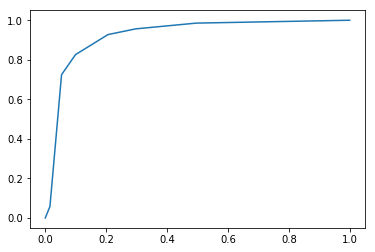

In [90]:
plt.plot(fpr1,tpr1,"-")

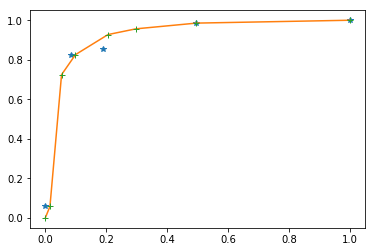

In [96]:
plt.plot(fpr,tpr,"*",fpr1,tpr1,"-",fpr2,tpr2,"+")

In [100]:
#auc for tree 1
metrics.roc_auc_score(y_test,p1)

0.9081203672972673

In [101]:
metrics.roc_auc_score(y_test,p2)

0.9237747538444517

In [102]:
metrics.roc_auc_score(y_test,p3)

0.9237747538444517